In [ ]:
# Run this cell once when starting on notebook.
# On Google Colab, wait for the Google Drive permission prompts before proceeding
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
try:
    %load_ext jupyter_ai_magics
except:
    print("%%ai cells will not work in this notebook")
    print("Please use Gemini for AI queries instead")
from datascience import *
import numpy as np
import math

DATA_FOLDER="data/"
try:
  from google.colab import drive
  drive.mount('/content/drive', force_remount=True)
  !mkdir -p /content/data
  !gdown --folder https://drive.google.com/drive/folders/1XifjqyxFHvjK6nOUi4doYsG12hGPhOcI?usp=drive_link -O /content/data
  DATA_FOLDER = DATA_FOLDER.replace("data/", "/content/data/")
  !ls -l /content/data
except:
  print("Google Drive not mounted; this is normal on Jupyter Hub")


%%ai cells will not work in this notebook
Please use Gemini for AI queries instead
Mounted at /content/drive
Retrieving folder contents
Processing file 1hOMU36QJH-8E1xMqZqick7tdYPtRqXWc codes.csv
Processing file 1-pQmPDnV44eDEVIOm_dglgktbO1ng7pe data_science_salaries_raw.csv
Processing file 1Cl56p5ygZPsG_TdGagMpd2wxMAnsNUN0 ucsb-f25-courses.csv
Processing file 1A6TJBGq7Fg5eO_4XrHgrRRM27RRxB6w7 ucsb-m25-courses.csv
Processing file 1KqFgPgttI11ADhBdGWipQ4RaCyM7S8iZ ucsb-s25-courses.csv
Processing file 1DHBdvECi_-cQtiJ1FZl4v_JfLgAMrauE world_happiness_2015.csv
Processing file 10lU_ehl4CmZqXZ8Ow4tz_G4zHvB9kkwV world_happiness_2019.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1hOMU36QJH-8E1xMqZqick7tdYPtRqXWc
To: /content/data/codes.csv
100% 6.40k/6.40k [00:00<00:00, 18.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-pQmPDnV44eDEVIOm_dglgktbO1ng7pe
To: /content/da

# Lecture 13, CMPSC 5A, S25

Tue 05/13/2025, Week 7

Google Colab versions of lecture notebooks can be found in this folder:
* <https://drive.google.com/drive/folders/1jS1Fa0BpGUVaijXwIYX0I21Un6XOGQM-?usp=sharing>

Note that the Google Colab version will have any updates made during class, while the copy on Jupyter Hub may not.


# Midterm Project

Any questions about the midterm project?

* For reference, here's a link to the [General Instructions, CS5A S25 Midterm](https://docs.google.com/document/d/1gYMuXukOTtJkEthxUeHmWuA1Qn9BtIYkSJa37Gb524E/edit?usp=sharing)




## ic21 Participation Assignment

Just the one today, on Gradescope as [ic21](https://www.gradescope.com/courses/1014383/assignments/6224248/)




# Where are we in the reading?

By today, you should have finished reading:

* [Chapter 1: What is Data Science](https://inferentialthinking.com/chapters/01/what-is-data-science.html)
* [Chapter 2 Causality and Experiments](https://inferentialthinking.com/chapters/02/causality-and-experiments.html)
* [Chapter 3: Programming in Python](https://inferentialthinking.com/chapters/03/programming-in-python.html)
* [Chapter 4: Data Types](https://inferentialthinking.com/chapters/04/Data_Types.html)
* [Chapter 5: Sequences](https://inferentialthinking.com/chapters/05/Sequences.html)
* [Chapter 6: Tables](https://inferentialthinking.com/chapters/06/Tables.html)
* [Chapter 7: Visualization](https://inferentialthinking.com/chapters/07/Visualization.html)
* [Chapter 8: Functions and Tables (Intro)](https://inferentialthinking.com/chapters/08/Functions_and_Tables.html)

New Reading for Today (week 7, 05/13)

* First part of [Chapter 9](https://inferentialthinking.com/chapters/09/Randomness.html#)
  * [Chapter 9 (intro)](https://inferentialthinking.com/chapters/09/Randomness.html#) - Booleans (`True`, `False`) and comparisons
  * [Section 9.1 (Conditional Statements)](https://inferentialthinking.com/chapters/09/1/Conditional_Statements.html#) - `if`/`elif`/`else`
  * [Section 9.2 (Iteration)](https://inferentialthinking.com/chapters/09/2/Iteration.html) - loops, for loops, "augmenting arrays" (the *accumulator pattern*)

New Reading for Thursday (week 7, 05/15)

* Second part of [Chapter 9](https://inferentialthinking.com/chapters/09/Randomness.html#)
  * [Section 9.3 (Simulation)](https://inferentialthinking.com/chapters/09/3/Simulation.html)
  * [Section 9.4 (The Monty Hall Problem)](https://inferentialthinking.com/chapters/09/4/Monty_Hall_Problem.html)
  * [Section 9.5 (Finding Probabilities)](https://inferentialthinking.com/chapters/09/5/Finding_Probabilities.html)



*New Reading for next Tuesday (week 8, 05/20):*

Don't worry that these first four are slightly out of order; they are relatively simple and don't depend on material from earlier chapters.  

This textbook was intended for a 15 week semester course, and we only have 10 weeks; I want to make sure that you don't miss out on the most important concepts.

* [Chapter 14 (intro, Why the Mean Matters)](https://inferentialthinking.com/chapters/14/Why_the_Mean_Matters.html)
* [Section 14.1, (Properties of the Mean)](https://inferentialthinking.com/chapters/14/1/Properties_of_the_Mean.html)
* [Section 14.2, (Variability)](https://inferentialthinking.com/chapters/14/2/Variability.html)
* [Section 15.1, (Correlation)](https://inferentialthinking.com/chapters/15/1/Correlation.html)

*New Reading for next Thursday (week 8, 05/22):*

* [Chapter 10 (Sampling and Empirical Distributions)](https://inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html)

*New Reading for Tuesday (week 9, 05/27):*

* [Chapter 11 (Testing Hypotheses, including p-values)](https://inferentialthinking.com/chapters/11/Testing_Hypotheses.html)

New Reading for Thursday (week 9, 05/29):
* [Chapter 12 (Comparing Two Samples, including A/B testing)](https://inferentialthinking.com/chapters/11/Testing_Hypotheses.html)

Unless I update you otherwise, this is all the reading for the quarter.




## Data Cleaning

In your midterm projects, you are asked to "clean your data".

For example, here's question 1 from *Exoplanets*



In [ ]:
1 + 2 + 3 + np.nan

nan

> **Question 1.** Real-world datasets do not always have complete information! If you observe some of the rows above, you will find a `nan` (Not a Number). `nan` values are **NOT** strings. They are of type `None` (another kind of data type). These are missing values that can cause issues if we try to use their corresponding rows to do any kind of arithmetic. Let's do some data cleaning first and then understand what each of the columns mean.
>
> There are many ways to work with missing or skewed data. For now, we will just choose to delete any rows thats that have missing information. Name the final table something meaningful - like `planets`. This will be the table we use to answer all the other questions.
>
> Hint: One way you can do this is by writing a function and then using the apply() function.
>
> Hint: In Python, `nan` is equal to *nothing*, not even itself. So, to check if a variable x is `nan`, you can test x != x.

And here's an example from *Life Expectancy*:





> **Question 1.** Our dataset has 2 columns at the end - `Economy Status - Developed` and `Economy Status - Developing`. We want to clean our dataset up a little bit as follows:
1. We want to add a new column to the table called `Status`. `Status` should have either of the two values:
  - `Developed` corresponding to a 1 in the column `Economy Status - Developed`.
  - `Developing` corresponding to a 1 in the column `Economy Status - Developing`.
2. Drop the columns `Economy Status - Developed` and `Economy Status - Developing`
>
> The final table should look like this:

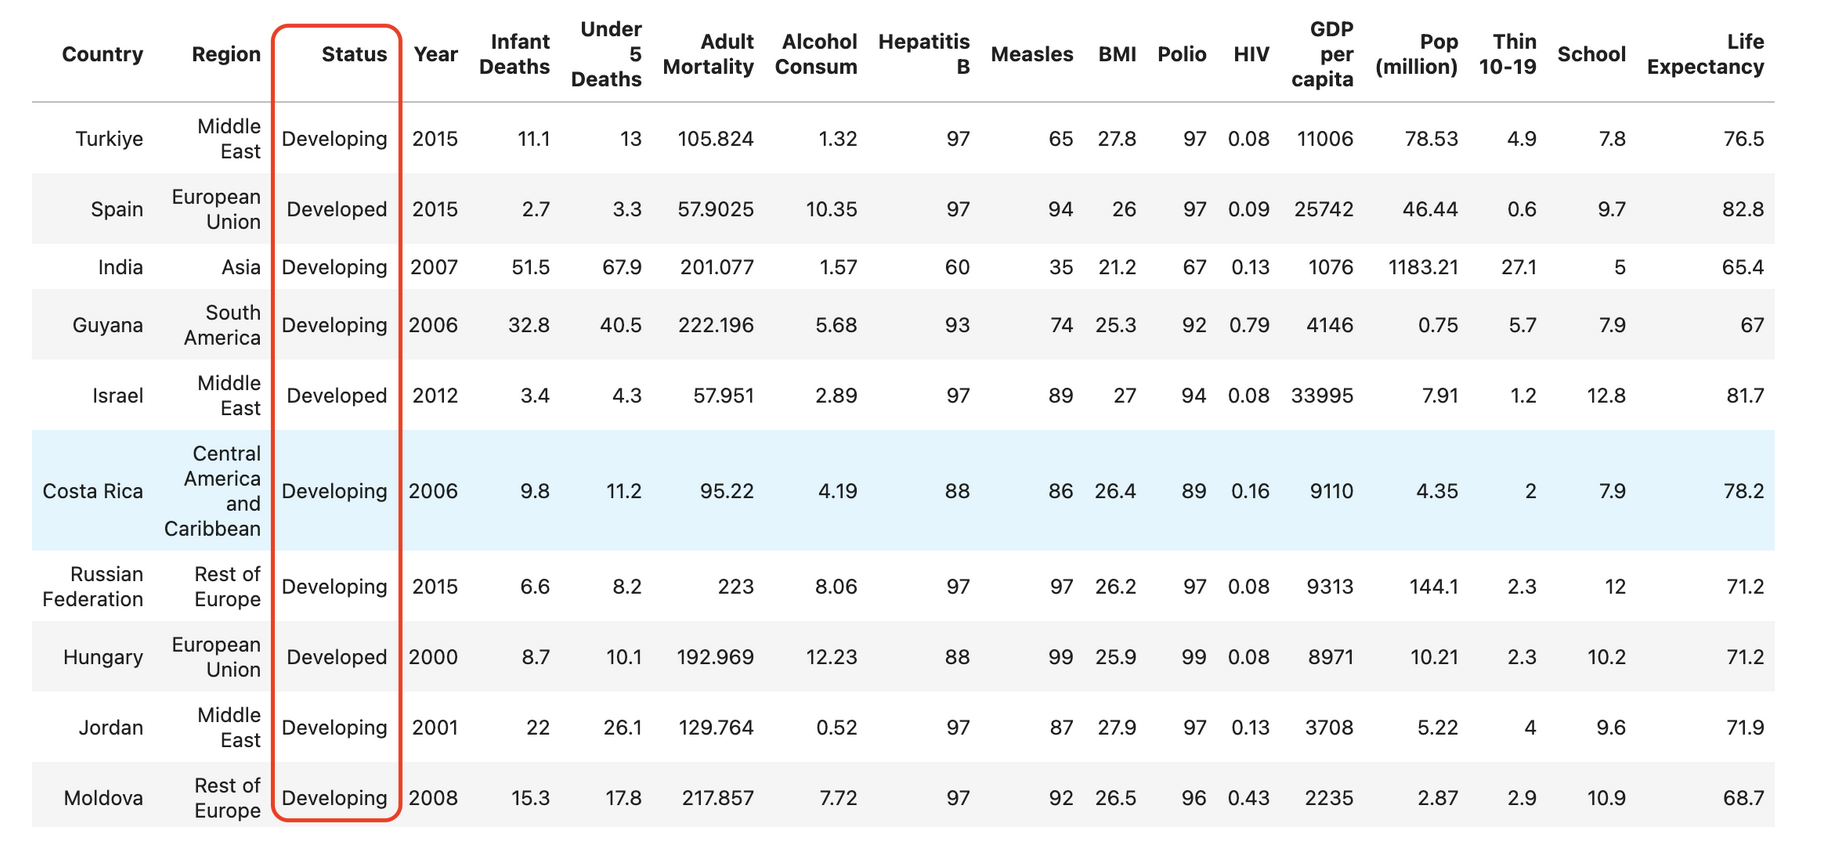


> **NOTES and HINTS:**
>- It is not required to be the 3rd column, you can have it be anywhere you like.
>- Call the new cleaned table `life_expectancy` or something descriptive to know that this is the main table you are dealing with.
>- **Once you obtain the final table that looks like the picture above, you can simply display the table by calling the table name. No need to run that complex piece of code like you did above anymore.**
>- If you are not sure whether you successfully added `Status` and dropped `Economy Status - Developed` and `Economy Status - Developing`, simply run `life_expectancy.labels` to know which columns are in the final table.
>- The `apply` function may be useful here but it is not the only way to solve this question.
- In Python, `nan` is equal to *nothing*, not even itself. So, to check if a variable x is `nan`, you can test x != x.

And finally, here's an example from *Titanic*:

> **Question 1:** Real-world datasets do not always have complete information! If you observe some of the rows above, you will find a `nan` (Not a Number). **`nan` values are not strings in the case of this dataset**. They are of type `None` (another kind of data type). These are missing values that can cause issues if we try to use their corresponding rows to do any kind of arithmetic. There are many ways to work with missing or skewed data. For now, we will just choose to delete any rows that have missing information. Name the final table something meaningful - like `titanic`. This will be the table we use to answer all the other questions.
>
> *Hint:*
> - One way you can do this is by writing a function and then using the `.apply()` function.
> - **Your final dataset should have roughly 1000-1100 rows.**
> - In Python, `nan` is equal to *nothing*, not even itself. So, to check if a variable x is `nan`, you can test x != x.
>
> **Note: Do not remove rows if they are only missing values in the `boat`, `body` and `home.dest` columns. Missing values in `boat` and `body` are deliberately missing. They correspond to those who did not get on the lifeboat and did not die or were not found respectively. We are okay to work with `home.dest` as it is.**

## Comparing the "data cleaning" steps for the three projects

It appears that *Titanic* and *Exoplanets* projects both involve cleaning out data that has `nan` values in it, representing missing data.  For folks on these projects, I want to go over this to make sure you understand what you are supposed to do.

By contrast, this doesn't appear to be the case for *Life Expectancy*; in that case, it's more similar to what we've done before with the course table:
* Creating new columns with an `apply` function
* Rearranging or dropping columns with `select`, `drop`, `relabel`

The notebook still has this line it it, but I think this is a "red herring"; something that was copied/pasted from the other two projects, but doesn't apply here. (I could be wrong).

> - In Python, `nan` is equal to *nothing*, not even itself. So, to check if a variable x is `nan`, you can test x != x.

It would be unfair if I went over this for the `Titanic` project, and not `Exoplanets`, or the reverse.   But it would be redundant to do both.

So, I'll do neither: instead, I'll choose an entirely different data set, and show what a very similar cleaning process looks like on that dataset.

### Cleaning your data

Real-world datasets are not always *clean*, meaning they may contain some data that's just plain *wrong*.

The process of taking a data set and removing invalid values is called *data cleaning*.  

It's a process that has to be done thoughtfully, because if not done carefully, it can introduce bias into the data.   But *not* doing it can *also* introduce bias.

In choosing how to clean your data, it's important to know what your purpose is in analyzing the data.

Examples:

* Suppose we are exploring class sizes at UCSB.  If our data set contains courses that are not "regular classroom courses", e.g. individual research classes taught 1-on-1, including those in the data may throw off any kind of averages, medians, etc.
* Suppose we are analyzing salaries for jobs in data science. If our data set contains values that are missing, finding averages, distributions, etc. may result in erroneous conclusions.

Common Data Cleaning Tasks:

* Checking for missing values
* Checking for duplicate entries



## Data Cleaning Example: Data Science Salaries

Our data folder contains a data set of Data Science Salaries that has some missing values in it.  We'll use this as an exercise in data cleaning.

Let's first look at this table:

In [ ]:
salaries_unclean = Table.read_table(DATA_FOLDER + "data_science_salaries_raw.csv")
salaries_unclean

Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023
Data Scientist,Full-Time,Senior,Expert,126000,United States Dollar,United States,126000,United States,Medium,2023
Data Scientist,Full-Time,Senior,Expert,170000,United States Dollar,United States,170000,United States,Medium,2023
Data Scientist,Full-Time,Senior,Expert,130000,United States Dollar,United States,130000,United States,Medium,2023
Data Engineer,Full-Time,Mid,Intermediate,85000,British Pound Sterling,United Kingdom,104584,United Kingdom,Medium,2023
Data Engineer,Full-Time,Mid,Intermediate,75000,British Pound Sterling,United Kingdom,92280,United Kingdom,Medium,2023


To get to know the data, let's take a few random samples of ten rows.  You may or may not see anything that looks sketchy, but it's a good start.

In [ ]:
salaries_unclean.sample(10)

Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
Data Engineer,Full-Time,Senior,Expert,82500,British Pound Sterling,United Kingdom,113476,United Kingdom,Medium,2021
Analytics Engineer,Full-Time,Mid,Intermediate,85000,British Pound Sterling,United Kingdom,104663,United Kingdom,Medium,2022
Analytics Engineer,Full-Time,Senior,Expert,130000,United States Dollar,United States,130000,United States,Medium,2022
Computer Vision Engineer,Freelance,Senior,Expert,60000,United States Dollar,United States,60000,Russian Federation,Small,2020
Data Engineer,Full-Time,Senior,Expert,107500,United States Dollar,United States,107500,United States,Medium,2023
Data Engineer,Full-Time,Senior,Expert,174350,United States Dollar,United States,174350,United States,Medium,2023
Data Analyst,Full-Time,Senior,Expert,136505,United States Dollar,United States,136505,United States,Medium,2023
ML Engineer,Full-Time,Senior,Expert,208450,United States Dollar,United States,208450,United States,Medium,2023
Data Engineer,Full-Time,Senior,Expert,142200,United States Dollar,Germany,142200,Germany,Medium,2023
Data Scientist,Full-Time,Mid,Intermediate,83000,British Pound Sterling,United Kingdom,102200,United Kingdom,Medium,2022


Next, let's check the Salary column, since that's a column that we might be doing analysis on.  We want to see if any of the values in that column have the special value `nan`, which stands for "Not a Number".

Here's how we can check that:


In [ ]:
# Pull out all of the salaries into a column
salaries = salaries_unclean.column('Salary in USD')
salaries

array([ 210000.,  165000.,  185900., ...,  104584.,   92280.,  208500.])

In [ ]:
demo = make_array(1, 2, np.nan, 4, 5)
demo

array([  1.,   2.,  nan,   4.,   5.])

In [ ]:
np.isnan(demo)

array([False, False,  True, False, False], dtype=bool)

In [ ]:
np.sum(make_array(True, False, False, True, True))

3

In [ ]:
# Check whether each is the value nan
np.isnan(salaries_unclean.column('Salary in USD'))

array([False, False, False, ..., False, False, False], dtype=bool)

In [ ]:
# Count how many of these are true
np.count_nonzero(np.isnan(salaries_unclean.column('Salary in USD')))

4

So, we could write a function that will take a table and column name, and tell us how many values in that column are the value `nan`:

In [ ]:
def count_nans(table, column_name):
    return np.count_nonzero(np.isnan(table.column(column_name)))

salary_in_USD_nans = count_nans(salaries_unclean, 'Salary in USD')
salary_nans = count_nans(salaries_unclean, 'Salary')
year_nans = count_nans(salaries_unclean, 'Year')
print(f"Number of nans in Salary in USD: {salary_in_USD_nans}")
print(f"Number of nans in Salary: {salary_nans}")
print(f"Number of nans in Year: {year_nans}")

Number of nans in Salary in USD: 4
Number of nans in Salary: 4
Number of nans in Year: 0


Now this tells us how many `nan` values there are, i.e. whether we need to continue with cleaning.  But it doesn't tell us which rows have those values, and it doesn't remove them from the data set.  So we have more work to do.

Here's a hint from the Midterm Notebooks:

> Hint: In Python, `nan` is equal to *nothing*, not even itself. So, to check if a variable x is `nan`, you can test x != x.

So, we can't directly check whether a variable is equal to `nan`.  Check this out!



In [ ]:
x = np.nan
x

nan

In [ ]:
type(x)

float

In [ ]:
np.isnan(x)

True

In [ ]:
x == x

False

In [ ]:
x == np.nan

False

In [ ]:
np.isnan(salaries_unclean.column('Salary in USD'))

array([False, False, False, ..., False, False, False], dtype=bool)

It appears that testing whether something is a `nan` value can be a bit tricky!  But the `np.isnan` function appears to be a safe way to do it:

In [ ]:
five_rows = salaries_unclean.sample(5)
five_rows

Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
Data Scientist,Full-Time,Mid,Intermediate,58000,Euro,Germany,60938,Germany,Medium,2022
Business Data Analyst,Full-Time,Entry,Junior,50000,Euro,Luxembourg,59102,Luxembourg,Large,2021
Data Engineer,Full-Time,Mid,Intermediate,82900,United States Dollar,United States,82900,United States,Medium,2022
Machine Learning Engineer,Full-Time,Entry,Junior,30000,United States Dollar,United Kingdom,30000,United Kingdom,Large,2022
Data Engineer,Full-Time,Senior,Expert,124230,United States Dollar,United States,124230,United States,Medium,2023


In [ ]:
five_rows.where(make_array(False, True, False, True, True))

Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
Business Data Analyst,Full-Time,Entry,Junior,50000,Euro,Luxembourg,59102,Luxembourg,Large,2021
Machine Learning Engineer,Full-Time,Entry,Junior,30000,United States Dollar,United Kingdom,30000,United Kingdom,Large,2022
Data Engineer,Full-Time,Senior,Expert,124230,United States Dollar,United States,124230,United States,Medium,2023


In [ ]:
nan_rows = salaries_unclean.where(np.isnan(salaries_unclean.column('Salary in USD')))
nan_rows

Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
nan,Full-Time,nan,Expert,nan,United States Dollar,United States,nan,United States,Medium,2023
nan,Full-Time,nan,Expert,nan,United States Dollar,United States,nan,United States,Medium,2023
nan,Full-Time,nan,Expert,nan,United States Dollar,United States,nan,United States,Medium,2023
nan,Full-Time,nan,Expert,nan,United States Dollar,United States,nan,United States,Medium,2023


Since that worked, let's try the opposite; we'll just put the function `np.logical_not` in front of `np.isnan`:

In [ ]:
valid_rows = salaries_unclean.where(np.logical_not(np.isnan(salaries_unclean.column('Salary in USD'))))
valid_rows

Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023
Data Scientist,Full-Time,Senior,Expert,126000,United States Dollar,United States,126000,United States,Medium,2023
Data Scientist,Full-Time,Senior,Expert,170000,United States Dollar,United States,170000,United States,Medium,2023
Data Scientist,Full-Time,Senior,Expert,130000,United States Dollar,United States,130000,United States,Medium,2023
Data Engineer,Full-Time,Mid,Intermediate,85000,British Pound Sterling,United Kingdom,104584,United Kingdom,Medium,2023
Data Engineer,Full-Time,Mid,Intermediate,75000,British Pound Sterling,United Kingdom,92280,United Kingdom,Medium,2023


Let's check whether this data is clean:


In [ ]:
salary_in_USD_nans = count_nans(valid_rows, 'Salary in USD')
salary_nans = count_nans(valid_rows, 'Salary')
year_nans = count_nans(valid_rows, 'Year')
print(f"Number of nans in Salary in USD: {salary_in_USD_nans}")
print(f"Number of nans in Salary: {salary_nans}")
print(f"Number of nans in Year: {year_nans}")

Number of nans in Salary in USD: 0
Number of nans in Salary: 0
Number of nans in Year: 0


It appears we got rid of all of the `nan` values!  But as a sanity check, let's make sure that we have the number of rows we expect.

How many rows were in the original dataset?

In [ ]:
salaries_unclean.num_rows

3311

In [ ]:
nan_rows.num_rows

4

In [ ]:
valid_rows.num_rows

3307

In [ ]:
# Does it add up?
salaries_unclean.num_rows == nan_rows.num_rows + valid_rows.num_rows

True

It appears that this did the trick!  So `valid_rows` is now our cleaned data set, free of any rows that:

* contain `nan` in `Salary` or
* contain `Salary in USD`.

Example of using with_columns:


In [ ]:
t = Table().with_columns({

    'letter': ['a', 'b', 'c', 'z'],

    'count':  [  9,   3,   3,   1],

    'points': [  1,   2,   2,  10],

})
t

letter,count,points
a,9,1
b,3,2
c,3,2
z,1,10


In [ ]:
t.rows

Rows(letter | count | points
a      | 9     | 1
b      | 3     | 2
c      | 3     | 2
z      | 1     | 10)

# Removing Duplicates

Here is some code to remove duplicates.  It's a little tricky, but we'll look through it a bit at a time, and try to understand how it works.


First, we'll use someting called `.rows`, which we can use to turn a table into a numpy array.

It is explained at this link if you want to read more about it:
* <https://www.data8.org/datascience/_autosummary/datascience.tables.Table.rows.html#datascience.tables.Table.rows>

In [ ]:
# Convert the table to a numpy array
# https://www.data8.org/datascience/_autosummary/datascience.tables.Table.rows.html#datascience.tables.Table.rows
# type(salaries_unclean.rows)
data = np.array(valid_rows.rows)
data


array([['Data Engineer', 'Full-Time', 'Senior', ..., 'United States',
        'Medium', '2023'],
       ['Data Engineer', 'Full-Time', 'Senior', ..., 'United States',
        'Medium', '2023'],
       ['Data Engineer', 'Full-Time', 'Senior', ..., 'United States',
        'Medium', '2023'],
       ..., 
       ['Data Engineer', 'Full-Time', 'Mid', ..., 'United Kingdom',
        'Medium', '2023'],
       ['Data Engineer', 'Full-Time', 'Mid', ..., 'United Kingdom',
        'Medium', '2023'],
       ['Analytics Engineer', 'Full-Time', 'Senior', ..., 'United States',
        'Medium', '2023']],
      dtype='<U40')

The variable `data` now contains all of the data in our table, but it's not in table form any more.  We've converted it into a `numpy.ndarray`.  The data is all still there, but represented in a different form.

We can't directly do table methods on it, but we can do `numpy` methods on it, and we are going to use that to look for, and remove duplicates.  Then, we'll turn it back to the `table` format that we know and love.

## Using `np.unique`

The `numpy` function `np.unique` allows us to look through a `numpy` array for duplicates.  It gives us back *two* return values, as shown in this code cell:


In [ ]:
experiment_table = Table().with_columns({

    'letter': ['a', 'a', 'c', 'a'],

    'count':  [  9,   9,   3,   9],

    'points': [  1,   1,   2,  1],

})
experiment_table

letter,count,points
a,9,1
a,9,1
c,3,2
a,9,1


In [ ]:
experiment_data = np.array(experiment_table.rows)
experiment_data
ur_experiment_data, counts_experiment_data = np.unique(experiment_data, axis=0, return_counts=True)

In [ ]:

print("\n\n********* unique rows *********")
print(ur_experiment_data)

print("\n\n********* counts *********")
print(counts_experiment_data)




********* unique rows *********
[['a' '9' '1']
 ['c' '3' '2']]


********* counts *********
[3 1]


In [ ]:
# finds unique elements of an array and also returns the number of times each unique item appears
# axis to operate on, here axis=0 is important if we want to find unique rows
# (axis=1 would give us unique columns - doesn't make sense in this case)
unique_rows, counts =  np.unique(data, axis=0, return_counts=True)# gives us two arrays


In [ ]:

print("\n\n********* unique rows *********")
print(unique_rows)

print("\n\n********* counts *********")
print(counts)




********* unique rows *********
[['AI Architect' 'Full-Time' 'Executive' ..., 'Belgium' 'Large' '2023']
 ['AI Architect' 'Full-Time' 'Senior' ..., 'United States' 'Large' '2023']
 ['AI Architect' 'Full-Time' 'Senior' ..., 'United States' 'Medium' '2023']
 ..., 
 ['Staff Data Scientist' 'Contract' 'Senior' ..., 'United States' 'Medium'
  '2021']
 ['Staff Data Scientist' 'Full-Time' 'Senior' ..., 'United States' 'Medium'
  '2020']
 ['Staff Machine Learning Engineer' 'Full-Time' 'Senior' ...,
  'United States' 'Medium' '2021']]


********* counts *********
[1 1 1 ..., 1 1 1]


In [ ]:
# This code finds the rows that had duplicates among all of the unique rows.
# I'll be honest; I didn't understand how this code worked when I first saw it
# But we can use Gemini AI on Google CoLab to explain it

duplicate_rows = unique_rows[counts > 1]
duplicate_rows

array([['Analytics Engineer', 'Full-Time', 'Senior', 'Expert', '208500.0',
        'United States Dollar', 'United States', '208500.0',
        'United States', 'Medium', '2023'],
       ['Data Engineer', 'Full-Time', 'Mid', 'Intermediate', '75000.0',
        'British Pound Sterling', 'United Kingdom', '92280.0',
        'United Kingdom', 'Medium', '2023'],
       ['Data Engineer', 'Full-Time', 'Mid', 'Intermediate', '85000.0',
        'British Pound Sterling', 'United Kingdom', '104584.0',
        'United Kingdom', 'Medium', '2023'],
       ['Data Engineer', 'Full-Time', 'Senior', 'Expert', '165000.0',
        'United States Dollar', 'United States', '165000.0',
        'United States', 'Medium', '2023'],
       ['Data Engineer', 'Full-Time', 'Senior', 'Expert', '210000.0',
        'United States Dollar', 'United States', '210000.0',
        'United States', 'Medium', '2023'],
       ['Data Scientist', 'Full-Time', 'Senior', 'Expert', '130000.0',
        'United States Dollar', 'Unite

# Making sure everything is accounted for

We originally had this many rows in our dataset before we started removing duplicates:


In [ ]:
valid_rows.num_rows

3307

We now have this many rows in the unique_rows (note that we use `len` because this is a numpy array, not yet a table):

In [ ]:
len(unique_rows)

3300

That means we removed seven duplicates.   Let's look at the counts array, and find how many of the counts were greater than 1:

In [ ]:
counts[counts > 1]

array([2, 2, 2, 2, 2, 2, 2])

That looks like seven elements, i.e. seven rows that had a count greater than 1 that were removed.  Each of then appeared twice (our math would be a bit trickier if any of these numbers were bigger than 2).

In [ ]:
len(counts[counts>1])

7

In [ ]:
# Do these match?
# Does what we started with == what we ended up with  + what we removed ?
valid_rows.num_rows == len(unique_rows) + len(counts[counts>1])


True

Yes it does! So all rows are accounted for, and `unique_rows` contains the de-duplicated data.

## Putting the table back together

Now that we have the `unique_rows`, we can put the table back together again.  

First, let's go back to our source of data, which was `valid_rows` and get all of the labels:

In [ ]:
unique_rows

array([['AI Architect', 'Full-Time', 'Executive', ..., 'Belgium', 'Large',
        '2023'],
       ['AI Architect', 'Full-Time', 'Senior', ..., 'United States',
        'Large', '2023'],
       ['AI Architect', 'Full-Time', 'Senior', ..., 'United States',
        'Medium', '2023'],
       ..., 
       ['Staff Data Scientist', 'Contract', 'Senior', ..., 'United States',
        'Medium', '2021'],
       ['Staff Data Scientist', 'Full-Time', 'Senior', ...,
        'United States', 'Medium', '2020'],
       ['Staff Machine Learning Engineer', 'Full-Time', 'Senior', ...,
        'United States', 'Medium', '2021']],
      dtype='<U40')

In [ ]:
# Column names
valid_rows.labels

('Job Title',
 'Employment Type',
 'Experience Level',
 'Expertise Level',
 'Salary',
 'Salary Currency',
 'Company Location',
 'Salary in USD',
 'Employee Residence',
 'Company Size',
 'Year')

In [ ]:
# Putting together a table with those labels and the unique rows
filtered_unique_salaries = Table(valid_rows.labels).with_rows(unique_rows)
filtered_unique_salaries

Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
AI Architect,Full-Time,Executive,Director,200000.0,Euro,United States,215936.0,Belgium,Large,2023
AI Architect,Full-Time,Senior,Expert,200000.0,United States Dollar,United States,200000.0,United States,Large,2023
AI Architect,Full-Time,Senior,Expert,204000.0,United States Dollar,United States,204000.0,United States,Medium,2023
AI Architect,Full-Time,Senior,Expert,330000.0,United States Dollar,United States,330000.0,United States,Medium,2023
AI Developer,Full-Time,Entry,Junior,120000.0,United States Dollar,Bosnia and Herzegovina,120000.0,Bosnia and Herzegovina,Small,2023
AI Developer,Full-Time,Entry,Junior,200000.0,Euro,Germany,215936.0,Germany,Large,2023
AI Developer,Full-Time,Entry,Junior,60000.0,Euro,Germany,64781.0,Germany,Medium,2023
AI Developer,Full-Time,Entry,Junior,80000.0,United States Dollar,Sweden,80000.0,Sweden,Medium,2023
AI Developer,Full-Time,Mid,Intermediate,100000.0,Singapore Dollar,Finland,74883.0,Finland,Medium,2023
AI Developer,Full-Time,Mid,Intermediate,200000.0,United States Dollar,United States,200000.0,United States,Medium,2023


Let's apply the same technique as before to verify that there are now no duplicates.


In [ ]:
# finds unique elements of an array and also returns the number of times each unique item appears
# axis to operate on, here axis=0 is important if we want to find unique rows
# (axis=1 would give us unique columns - doesn't make sense in this case)

fus_data = np.array(filtered_unique_salaries.rows)

unique_rows_fs, counts_fs = np.unique(fus_data, axis=0, return_counts=True) # gives us two arrays


In [ ]:

print("\n\n********* unique rows fs *********")
print(unique_rows_fs)

print("\n\n********* counts fs *********")
print(counts_fs)





********* unique rows fs *********
[['AI Architect' 'Full-Time' 'Executive' ..., 'Belgium' 'Large' '2023']
 ['AI Architect' 'Full-Time' 'Senior' ..., 'United States' 'Large' '2023']
 ['AI Architect' 'Full-Time' 'Senior' ..., 'United States' 'Medium' '2023']
 ..., 
 ['Staff Data Scientist' 'Contract' 'Senior' ..., 'United States' 'Medium'
  '2021']
 ['Staff Data Scientist' 'Full-Time' 'Senior' ..., 'United States' 'Medium'
  '2020']
 ['Staff Machine Learning Engineer' 'Full-Time' 'Senior' ...,
  'United States' 'Medium' '2021']]


********* counts fs *********
[1 1 1 ..., 1 1 1]


In [ ]:
duplicate_rows_fs = unique_rows_fs[counts_fs > 1]
duplicate_rows_fs

array([], shape=(0, 11),
      dtype='<U40')

We see that the duplicate_rows_fs variable is an empty array, so we can now be confident there are no duplicates in our data set.  The data set is clean!

## Some other checks we could perform

There are other checks we could perform when cleaning data:

* We could verify that all values in a field are within a reasonable range, but taking the min and max of a column, and verifying that the values seem reasonable.

* We could convert certain categories/values to upper or lower case - For example, if the data had the "Expert" level with several cases such as "EXpert", "EXPERT", "expert".  We might benefit from converting them all to lower of upper cased versions.  This might involve writing a function, using apply to create a new column, and then dropping and renaming the old column.



## For JupyterHub users: asking about `unique_rows[counts > 1]`

In [ ]:
%%ai openai-chat:gpt-3.5-turbo
unique_rows[counts > 1]. What does this do?

The expression `unique_rows[counts > 1]` filters the `unique_rows` array to only include rows that have a count greater than 1. 

To provide more context, `np.unique` returns the unique rows of a given array along with their counts. The result is returned as two arrays: `unique_rows` contains the unique rows, and `counts` contains the corresponding counts for each unique row.

By using the boolean condition `counts > 1`, we create a boolean array where each element represents whether the count for the corresponding row is greater than 1. 

By applying this boolean array as an index to `unique_rows`, we only select the rows where the count is greater than 1, effectively filtering out the unique rows and keeping duplicate rows. 

Here is an example to demonstrate this:

```python
import numpy as np

# Create an array with duplicate rows
arr = np.array([[1, 2], [2, 3], [1, 2], [3, 4], [2, 3]])

# Get the unique rows and their counts
unique_rows, counts = np.unique(arr, axis=0, return_counts=True)

# Filter unique rows to only include rows with count > 1
filtered_rows = unique_rows[counts > 1]

# Display the filtered rows
print(filtered_rows)
```

Output:
```
[[1 2]
 [2 3]]
```

The resulting `filtered_rows` array contains the rows `[1, 2]` and `[2, 3]`, which are the duplicate rows in the original array.

# If time remains, I'll give you time to check in with your group

If possible, I'll give you some time to check in with your midterm project group.

* You *may* use the Google Chat, but you are not *required* to do so.
* You may use *any* communication technique that the whole group agrees to use.
* I only made the Google Chat to ensure that you would have *at least one* way of getting in touch with each other on a platform you all have access to.